In [3]:
HTML(read(open("style.html"), String))

HTML{String}("<link href='https://fonts.googleapis.com/css?family=Alegreya+Sans:100,300,400,500,700,800,900,100italic,300italic,400italic,500italic,700italic,800italic,900italic' rel='stylesheet' type='text/css'>\r\n<link href='https://fonts.googleapis.com/css?family=Arvo:400,700,400italic' rel='stylesheet' type='text/css'>\r\n<link href='https://fonts.googleapis.com/css?family=PT+Mono' rel='stylesheet' type='text/css'>\r\n<link href='https://fonts.googleapis.com/css?family=Shadows+Into+Light' rel='stylesheet' type='text/css'>\r\n<link href='https://fonts.googleapis.com/css?family=Philosopher:400,700,400italic,700italic' rel='stylesheet' type='text/css'>\r\n\r\n<style>\r\n\r\n@font-face {\r\n    font-family: \"Computer Modern\";\r\n    src: url('https://mirrors.ctan.org/fonts/cm-unicode/fonts/otf/cmunss.otf');\r\n}\r\n\r\n.container { width: 100% }\r\n\r\n/* Formatting for header cells */\r\n.text_cell_render h1 {\r\n    font-family: 'Philosopher', sans-serif;\r\n    font-weight: 400;\r\n    font-size: 2.2em;\r\n    line-height: 100%;\r\n    color: rgb(0, 80, 120);\r\n    margin-bottom: 0.1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\t\r\n.text_cell_render h2 {\r\n    font-family: 'Philosopher', serif;\r\n    font-weight: 400;\r\n    font-size: 1.9em;\r\n    line-height: 100%;\r\n    color: rgb(200,100,0);\r\n    margin-bottom: 0.1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\t\r\n\r\n.text_cell_render h3 {\r\n    font-family: 'Philosopher', serif;\r\n    margin-top:12px;\r\n    margin-bottom: 3px;\r\n    font-style: italic;\r\n    color: rgb(94,127,192);\r\n}\r\n\r\n.text_cell_render h4 {\r\n    font-family: 'Philosopher', serif;\r\n}\r\n\r\n.text_cell_render h5 {\r\n    font-family: 'Alegreya Sans', sans-serif;\r\n    font-weight: 300;\r\n    font-size: 16pt;\r\n    color: grey;\r\n    font-style: italic;\r\n    margin-bottom: .1em;\r\n    margin-top: 0.1em;\r\n    display: block;\r\n}\r\n\r\n.text_cell_render h6 {\r\n    font-family: 'PT Mono', sans-serif;\r\n    font-weight: 300;\r\n    font-size: 10pt;\r\n    color: grey;\r\n    margin-bottom: 1px;\r\n    margin-top: 1px;\r\n}\r\n\r\n.text_cell_render em {\r\n    font-family: 'Philosopher', sans-serif;\r\n    color:        blue;\r\n    background-color: rgb(255,220,180);\r\n    font-size:    110%;\r\n    margin-left:   2px;\r\n    margin-right:  2px;\r\n    font-weight:   100;\r\n}\r\n\r\n.text_cell_render b {\r\n    color:            rgb(255,195,195);\r\n    background-color: rgb(0,0,0);\r\n    font-size:    110%;\r\n    margin-left:   2px;\r\n    margin-right:  2px;\r\n    font-weight:   650;\r\n}\r\n\r\n.text_cell_render tt {\r\n    font-size:    120%;\r\n    margin-left:   2px;\r\n    margin-right:  2px;\r\n    font-weight:   150;\r\n}\r\n\r\n.Codemirror {\r\n    font-family: \"PT Mono\", sans-serif;\r\n    font-size: 100%;\r\n}\r\n\r\n</style>")

In [ ]:
include("silent.jl")

In [4]:
using Pkg
@silent Pkg.add("Chess")
import Chess
@silent Pkg.add("NBInclude")
using NBInclude

In [5]:
@nbinclude "2.1 - Board.ipynb"
@nbinclude "3.0 - Piece-Values.ipynb"

isEndGame (generic function with 1 method)

***

# Alpha-Beta-Suche
Bei [`Alpha-Beta-Suche`](https://www.mygreatlearning.com/blog/alpha-beta-pruning-in-ai/) handelt es sich um eine Optimising des `MiniMax-Algorithmus`.

Der MiniMax-Algorithmus wird im Notebook [Minimax](3.2%20-%20Minimax.ipynb) beschrieben.

Die Alpha-Beta-Suche nutzt die Werte $\alpha$, die untere Schranke (Cutoff), und $\beta$, die obere Schranke (Cutoff), als Grenze für die erreichbaren Werte des Spielers. Diese beiden Werte werden bei jeder Knotenberechnung mit einbezogen. Die berechneten Werte werden mit den Grenzen verglichen. Wird das Cutoff-Kriterium erfüllt, so wird die Berechnung gestoppt und der Rest des Teilbaums nicht weiter bearbeitet. Das Endergebnis wird dabei nicht negativ beeinflusst. Durch das Cutoff-Kriterium werden sowohl Zeit als auch Ressourcen gespart.

Es gelten folgende Regeln:
+ $\alpha$ wird nur von **MAX** verschoben
+ $\beta$ wird nur von **MIN** verschoben
+ Der Initialwert für $\alpha$ = $-\infty$
+ Der Initialwert für $\beta$ = $\infty$

Das `Cutoff-Kriterium`:
+ $\alpha >= \beta$

Der genaue Ablauf wird beispielhaft an folgenden Grafiken erklärt. Die erste Abbildung zeigt die Ausgangssituation.

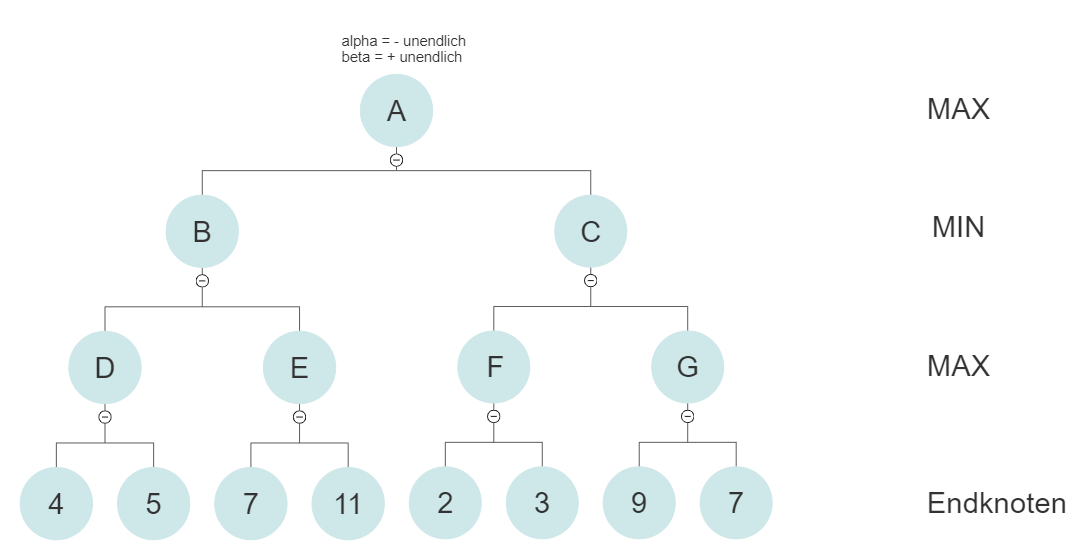

Die Suche wird mit ihren Start-Werten initialisiert.

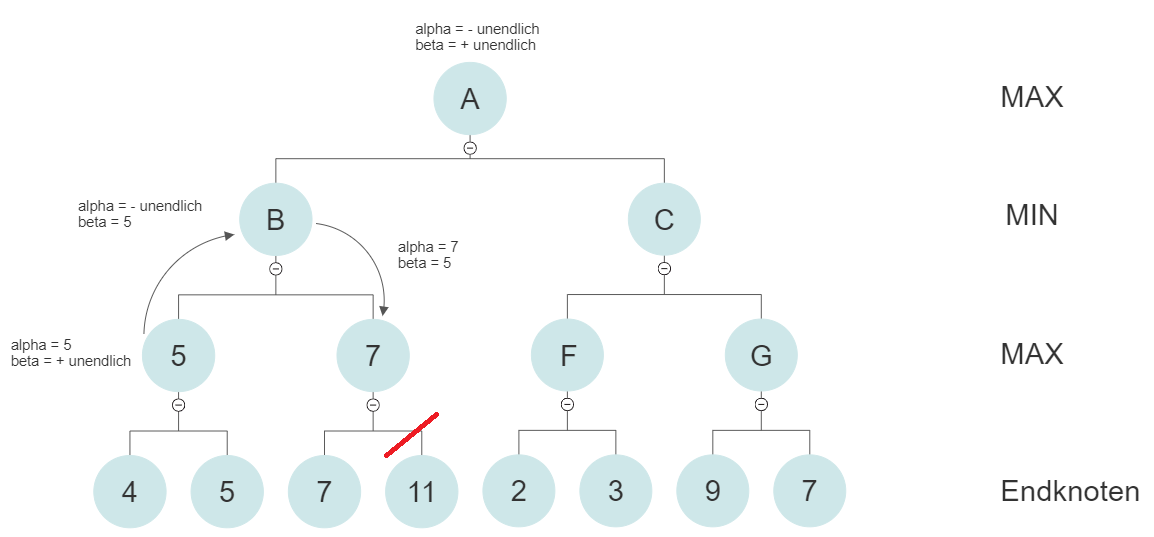
<br>

Diese Abbildung beschreibt den ersten Cutoff.

Die Werte für $\alpha$ und $\beta$ werden von der Wurzel an das erste, nicht berechnete Kind übergeben, welches es wiederum an seine erstes nicht berechnetes Kind übergibt. Dies wird so lange fortgesetzt, bis die nächsten Knoten die Endknoten sind.

Es wird nun die geforderte Operation, $MAX$ oder $MIN$, ausgeführt. Nach den geltenden Regeln wird eine $MAX$-Operation ausgeführt. Die Wertigkeit des Knotens ist gleichzeitig die neue Wertigkeit von $\alpha$.

Im nächsten Schritt wird Knoten `B` berechnet. Die Operation ist hier $MIN(5, \infty)$, $\beta$ wird also zu `5`. Da wir nun keinen Wert für $\alpha$ haben wird der Initialwert verwendet.

Der nächste Schritt ist die Berechnung von Knoten `E`. Es handelt sich um die Operation $MAX(7,11)$. Da jedoch der erste Endknoten bereits größer ist als $\beta$ und durch die $MAX$-Operation mindestens dieser Wert gewählt wird, wird das `Cutoff-Kriterium` erfüllt. Denn dem Knoten `E` und $\alpha$ wird die Wertigkeit `7` zugewiesen. Damit ist $\alpha >= \beta$ und der Rest des Teilbaums wird "abgeschnitten" und nicht weiter beachtet.

Anschließend geht die Suche wieder zurück zum Knoten `B`. Dieser führt die Operation $MIN(5,7)$ durch und bekommt die Wertigkeit `5`.


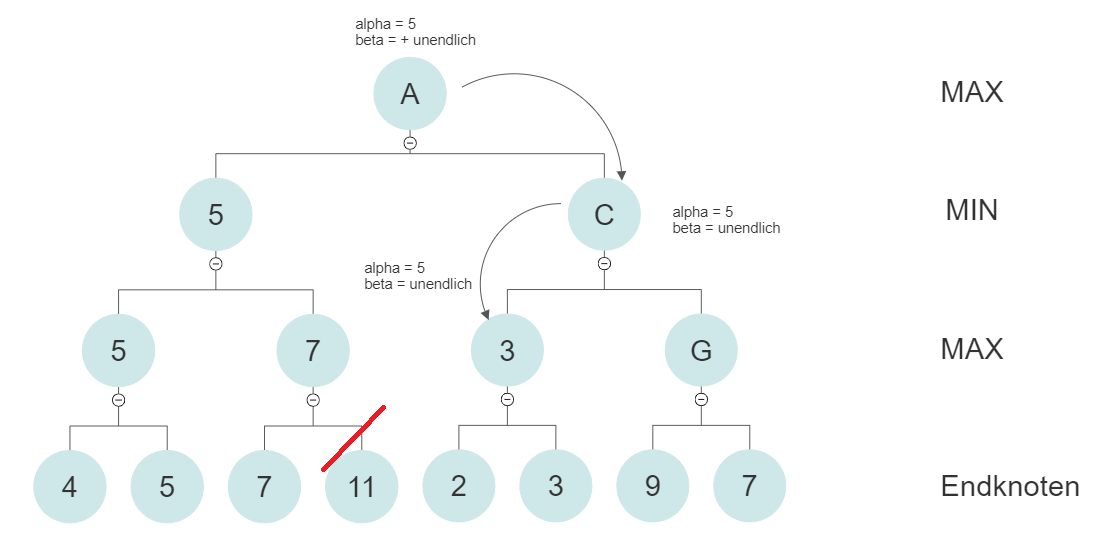
<br>


Diese Grafik zeigt den Beginn des Suchlaufs im rechten Teilbaum.

Der nächste Schritt ist die Berechnung des Knotens `A` mit der Operation $MAX(- \infty, 5)$. Daraus resultieren die Werte $\alpha = 5$ und $\beta = \infty$. Diese werden wie bereits beschrieben an die nicht berechneten Kinderknoten weitergegeben. Die Berechnung von Knoten `F` erfolgt mit $MAX(2,3)$ und ergibt die Wertigkeit `3`.




Anschließend wird der Knoten `C` mit der Operation $MIN (5,3)$ betrachtet. Dies ergibt einen Wert für $\beta = 3$ und somit $\alpha >= \beta$, denn $5 >= 3$. Folglich kann der Rest des Teilbaums "abgeschnitten" werden und `C` bekommt die Wertigkeit `3`. Dies ist in der nächsten Abbildung zusehen.

<br>

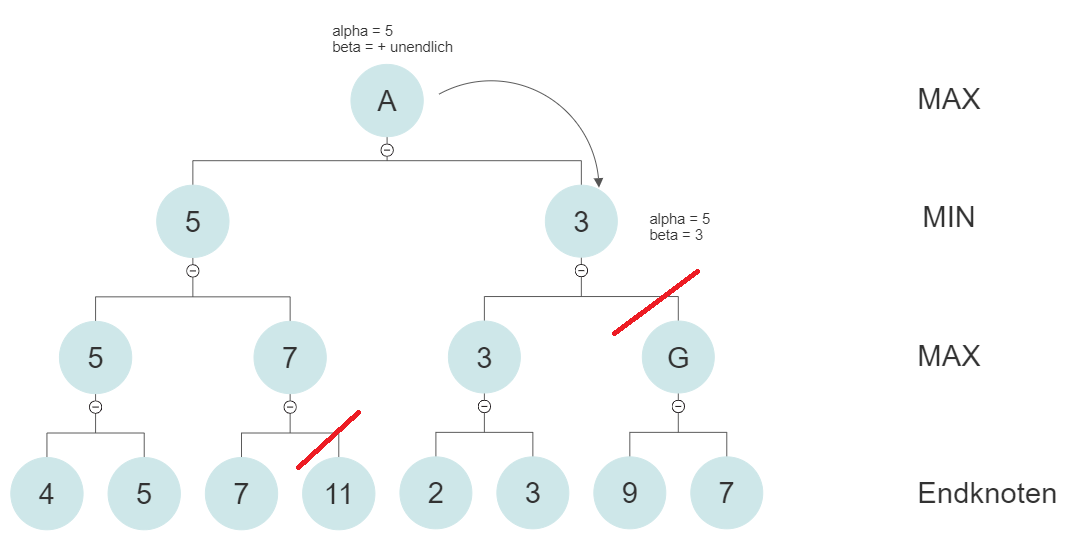

<br>



In der letzten Abbildung ist der vollständige Suchbaum nach der Berechnung für die Wurzel `A` mit $MAX(5,3)$ zu sehen. Die "abgeschnittenen" Teilbäume sind Rot, der bestmögliche Zug ist Grün eingefärbt.
<br>

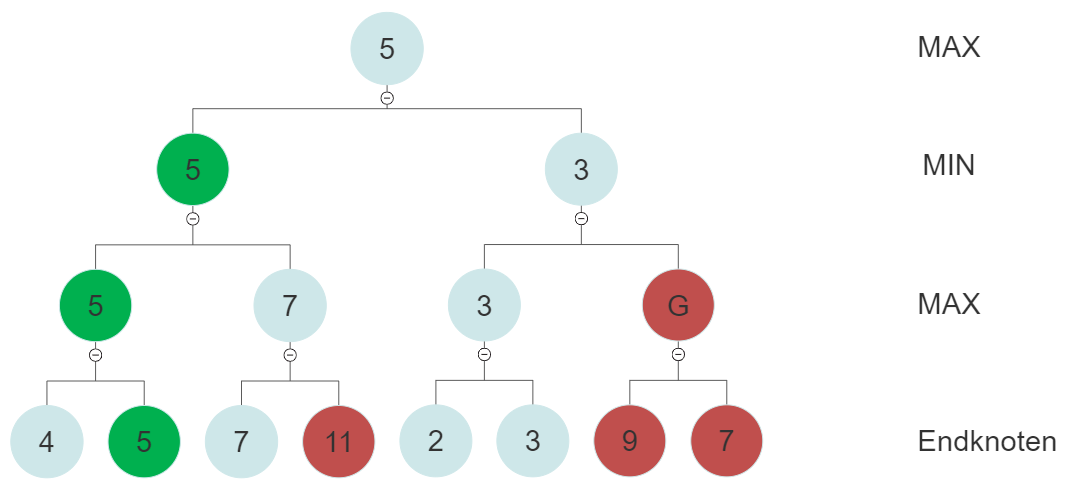

## Alpha-Beta-Suche ohne Memoisierung

Die Funktion `alphabetaMax` repräsentiert die Operation $MAX$ im beschriebenen Beispiel. Sie wird immer dann aufgerufen, wenn ein maximierter Wert berechnet werden muss. Gleichzeitig wird auch der $\alpha$-Wert verschoben.

Zusätzlich gibt es die Bedingung, dass die berechneten Werte einer deterministischen Alpha-Beta-Suche mit den Ergebnissen einer deterministischen MiniMax-Algorithmus Evaluierung übereinstimmen müssen.
+ `alphabetaMax` muss das gleiche Ergebnis berechnen wie `minimaxMax`, wenn das Maximum zwischen $\alpha$ und $\beta$ liegt
+ liegt das Maximum der `minimaxMax` unter $\alpha$, so muss `alphabetaMax` einen Wert kleiner gleich $\alpha$ berechnen
+ liegt das Maximum der `minimaxMax` über $\beta$, so muss `alphabetaMax` einen Wert größer gleich $\beta$ berechnen

**Input**:
+ extboard &rarr; der aktuelle Spielstand der Berechnung
+ depth &rarr;  Suchtiefe (maximale Suchtiefe - aktuelle Suchtiefe, depth = 0 &rarr; die maximale Suchtiefe ist erreicht)
+ α &rarr; die untere Grenze (für Cutoff)
+ β &rarr; die obere Grenze (für Cutoff)

**Output**:
+ α &rarr; der maximierte, bestmögliche Score der aktuellen Suche (verschobene α-Grenze)

In [6]:
function alphabetaMax(extboard::ExtendedBoard, depth::Int64, α::Int32, β::Int32)::Int32
    if extboard.repetitionRuleDraw
        return 0
    end
    legalMoves = Chess.moves(extboard.board)
    if length(legalMoves) == 0
        return evaluateTerminalPositionScore(extboard.board)
    elseif depth == 0
        return extboard.score
    end
    for move ∈ legalMoves
        undo = domove!(extboard, move)
        value = alphabetaMin(extboard, depth - 1, α, β)
        undomove!(extboard, undo)
        if value > α
            if value >= β
                return value
            end
            α = value
        end
    end
    Chess.recycle!(legalMoves)
    return α
end

alphabetaMax (generic function with 1 method)

Die Funktion `alphabetaMin` repräsentiert die Operation $MIN$ im beschriebenen Beispiel. Sie wird immer dann aufgerufen, wenn ein minimierter Wert berechnet werden muss. Gleichzeitig wird auch der $\beta$-Wert verschoben.

Zusätzlich gibt es die Bedingung, dass die berechneten Werte einer deterministischen Alpha-Beta-Suche mit den Ergebnissen einer deterministischen MiniMax-Algorithmus Evaluierung übereinstimmen müssen.
+ `alphabetaMax` muss das gleiche Ergebnis berechnen wie `minimaxMin`, wenn das Minimum zwischen $\alpha$ und $\beta$ liegt
+ liegt das Minimum der `minimaxMin` unter $\alpha$, so muss `alphabetaMax` einen Wert kleiner gleich $\alpha$ berechnen
+ liegt das Minimum der `minimaxMin` über $\beta$, so muss `alphabetaMax` einen Wert größer gleich $\beta$ berechnen
**Input**:
+ extboard &rarr; der aktuelle Spielstand der Berechnung
+ depth &rarr; Suchtiefe (maximale Suchtiefe - aktuelle Suchtiefe, depth = 0 &rarr; die maximale Suchtiefe ist erreicht)
+ α &rarr; die untere Grenze (für Cutoff)
+ β &rarr; die obere Grenze (für Cutoff)

**Output**:
+ β &rarr; der minimierte, bestmögliche Score der aktuellen Suche (verschobene β-Grenze)

In [7]:
function alphabetaMin(extboard::ExtendedBoard, depth::Int64, α::Int32, β::Int32)::Int32
    if extboard.repetitionRuleDraw
        return 0
    end
    legalMoves = Chess.moves(extboard.board)
    if length(legalMoves) == 0
        return evaluateTerminalPositionScore(extboard.board)
    elseif depth == 0
        return extboard.score
    end
    for move ∈ legalMoves
        undo = domove!(extboard, move)
        value = alphabetaMax(extboard, depth - 1, α, β)
        undomove!(extboard, undo)
        if value < β
            if value <= α
                return value
            end
            β = value
        end
    end
    Chess.recycle!(legalMoves)
    return β
end

alphabetaMin (generic function with 1 method)

Die Funktion `alphabetaOne` berechnet mithilfe der bereits beschriebenen Funktionen `alphabetaMax` und `alphabetaMin` das bestmögliche Vorgehen der KI.

**Input**:
+ extboard &rarr; der aktuelle Spielstand
+ depth &rarr; die gewünschte Suchtiefe 
+ log &rarr; die zu verwendende Log-Funktion

**Output**:
+ α (oder β) &rarr; der bestmögliche Score unter der gewünschten Suchtiefe
+ bestMove &rarr; der Zug mit dem bestmöglichen Score

In [8]:
function alphabetaOne(extboard::ExtendedBoard, depth::Int64, log::Function)::Tuple{Int32, Chess.Move}
    legalMoves = Chess.moves(extboard.board)
    sideIsWhite = Chess.sidetomove(extboard.board) == Chess.WHITE
    α = typemin(Int32)
    β = typemax(Int32)
    bestMove = legalMoves[1]
    for move ∈ legalMoves
        undo = domove!(extboard, move)
        value = (sideIsWhite ? alphabetaMin : alphabetaMax)(extboard, depth - 1, α, β)
        log("α = $(α), β = $(β), move = $(move)")
        if sideIsWhite
            if value > α
                bestMove = move
                if value >= β
                    return value
                end
                α = value
            end
        else
            if value < β
                bestMove = move
                if value <= α
                    return value
                end
                β = value
            end
        end
        undomove!(extboard, undo)
    end
    return (sideIsWhite ? α : β), bestMove
end

alphabetaOne (generic function with 1 method)

Die Funktion `alphabetaAll` berechnet mithilfe der bereits beschriebenen Funktionen `alphabetaMax` und `alphabetaMin` das bestmögliche Vorgehen der KI. Sie gibt alle gefundenen bestmöglichen Züge in Form eines Arrays aus.

**Input**:
+ extboard &rarr; der aktuelle Spielstand
+ depth &rarr; die gewünschte Suchtiefe 
+ log &rarr; die zu verwendende Log-Funktion

**Output**:
+ bestScore &rarr; der bestmögliche Score unter der gewünschten Suchtiefe
+ scoredMoves[bestScore] &rarr; alle Züge mit dem bestmöglichen Score

In [9]:
function alphabetaAll(extboard::ExtendedBoard, depth::Int64, log::Function)::Tuple{Int32, Vector{Chess.Move}}
    sideIsWhite = Chess.sidetomove(extboard.board) == Chess.WHITE
    scoredMoves = Dict{Int32, Vector{Chess.Move}}()
    pruneFunction = sideIsWhite ? alphabetaMax : alphabetaMin
    bestScore = pruneFunction(extboard, depth, typemin(Int32), typemax(Int32))
    pruneFunction = sideIsWhite ? alphabetaMin : alphabetaMax
    for move ∈ Chess.moves(extboard.board)
        undo = domove!(extboard, move)
        score = pruneFunction(extboard, depth - 1, typemin(Int32), typemax(Int32))
        log("score = $(score), move = $(move)")
        undomove!(extboard, undo)
        movesWithSameScore = get(scoredMoves, score, Chess.Move[])
        push!(movesWithSameScore, move)
        scoredMoves[score] = movesWithSameScore
    end
    bestScore = sideIsWhite ? typemin(Int32) : typemax(Int32)
    for score ∈ keys(scoredMoves)
        bestScore = (sideIsWhite ? max : min)(score, bestScore)
    end
    return bestScore, scoredMoves[bestScore]
end

alphabetaAll (generic function with 1 method)

***

## Alpha-Beta-Suche mit Memoisierung

Um die Alpha-Beta-Suche mit [Memoisierung]("4.0%20-%20Memoisierung%20-%20Zobrist-Hashing.ipynb") zu implementieren, muss eine neue Transpositionstabelle definiert werden. Zusätzlich zu der Tiefe, müssen die $\alpha$ und $\beta$ Cutoff-Werte ebenfalls gespeichert werden. Ohne die Cutoff-Werte kann keine sinnvolle Zuordnung bzw. Verwendung der gespeicherten Werte stattfinden.

Der Transpositionstabellen-Datentyp wird als Alias `AlphaBetaTransposition` definiert.

In [10]:
if !@isdefined(AlphaBetaTransposition)
    const AlphaBetaTransposition = Tuple{Int64, Int32, Char}
end  

Tuple{Int64, Int32, Char}

Dementsprechend muss auch die Evaluierungsfunktion angepasst werden. Dies geschieht, indem der Funktion `fetchOrCalcTransposition`, zusätzlich zu den $\alpha$ und $\beta$-Werten, die neue Transpositionstabelle übergeben wird.

**Input**:
+ extboard &rarr; der aktuelle Spielstand der Berechnung
+ func &rarr; der nächste Berechnungsschritt (maxMemo / minMemo)
+ depth &rarr; Suchtiefe (maximale Suchtiefe - aktuelle Suchtiefe)
+ α &rarr; die untere Grenze (für Cutoff)
+ β &rarr; die obere Grenze (für Cutoff)
+ transpositions &rarr; die Transpositionstabelle für Alpha-Beta-Suche

**Output**:
+ tScore &rarr; der Score des nächsten Berechnungsschritts (maximiert / minimiert)

In [11]:
function fetchOrCalcTransposition(
        extboard::ExtendedBoard, func::Function, depth::Int64,
        α::Int32, β::Int32, transpositions::Dict{UInt64, AlphaBetaTransposition})
    transposition = get(transpositions, extboard.zobrist.hash, nothing)
    if transposition != nothing
        tDepth, tScore, tFlag = transposition
        if tDepth >= depth
            #global hits += 1
            if (tFlag == '=') || (tFlag == '≤' && tScore <= α) || (tFlag == '≥' && β <= tScore)
                return tScore
            elseif tFlag == '≤'
                if tScore < β
                    β = tScore
                end
            else
                if tScore > α
                    α = tScore
                end
            end
        end
    end
    #global misses += 1
    tScore = func(extboard, depth - 1, α, β, transpositions)
    tFlag = tScore <= α ? '≤' : β <= tScore ? '≥' : '='
    transpositions[extboard.zobrist.hash] = (depth, tScore, tFlag)
    return tScore
end

getPositionScoreAlphaBeta (generic function with 1 method)

Die Funktion `alphabetaMemoMax` repräsentiert die Operation $MAX$ im beschriebenen Beispiel. Sie wird immer dann aufgerufen, wenn ein maximierter Wert berechnet werden muss. Gleichzeitig wird auch der $\alpha$-Wert verschoben.

Diese Funktion bekommt als Input die Transpositionstabellen übergeben. Es wird Memoisierung genutzt, sie speichert bereits berechnete Stellung samt Werten ab und nutzt diese bei Bedarf. Es werden Zeit und Ressourcen gespart.

**Input**:
+ extboard &rarr; der aktuelle Spielstand der Berechnung
+ depth &rarr;  Suchtiefe (maximale Suchtiefe - aktuelle Suchtiefe, depth = 0 &rarr; die maximale Suchtiefe ist erreicht)
+ α &rarr; die untere Grenze (für Cutoff)
+ β &rarr; die obere Grenze (für Cutoff)
+ transpositions &rarr; die Transpositionstabelle

**Output**:
+ α &rarr; der maximierte, bestmögliche Score der aktuellen Suche (verschobene α-Grenze)

In [12]:
function alphabetaMemoMax(
        extboard::ExtendedBoard, depth::Int64, α::Int32, β::Int32,
        transpositions::Dict{UInt64, AlphaBetaTransposition})::Int32
    if extboard.repetitionRuleDraw
        return 0
    end
    legalMoves = Chess.moves(extboard.board)
    if length(legalMoves) == 0
        return evaluateTerminalPositionScore(extboard.board)
    elseif depth == 0
        return extboard.score
    end
    for move ∈ legalMoves
        undo = domove!(extboard, move)
        score = fetchOrCalcTransposition(extboard, alphabetaMemoMin, depth, α, β, transpositions)
        undomove!(extboard, undo)
        if score > α
            if score >= β
                return score
            end
            α = score
        end
    end
    Chess.recycle!(legalMoves)
    return α
end

alphabetaMemoMax (generic function with 1 method)

Die Funktion `alphabetaMemoMin` repräsentiert die Operation $MIN$ im beschriebenen Beispiel. Sie wird immer dann aufgerufen, wenn ein maximierter Wert berechnet werden muss. Gleichzeitig wird auch der $\beta$-Wert verschoben.

Diese Funktion bekommt als Input die Transpositionstabellen übergeben. Es wird Memoisierung genutzt, sie speichert bereits berechnete Stellung samt Werten ab und nutzt diese bei Bedarf. Es werden Zeit und Ressourcen gespart.

**Input**:
+ extboard &rarr; der aktuelle Spielstand der Berechnung
+ depth &rarr; Suchtiefe (maximale Suchtiefe - aktuelle Suchtiefe, depth = 0 &rarr; die maximale Suchtiefe ist erreicht)
+ α &rarr; die untere Grenze (für Cutoff)
+ β &rarr; die obere Grenze (für Cutoff)
+ transpositions &rarr; die Transpositionstabelle

**Output**:
+ β &rarr; der minimierte, bestmögliche Score der aktuellen Suche (verschobene β-Grenze)

In [13]:
function alphabetaMemoMin(
        extboard::ExtendedBoard, depth::Int64, α::Int32, β::Int32,
        transpositions::Dict{UInt64, AlphaBetaTransposition})::Int32
    if extboard.repetitionRuleDraw
        return 0
    end
    legalMoves = Chess.moves(extboard.board)
    if length(legalMoves) == 0
        return evaluateTerminalPositionScore(extboard.board)
    elseif depth == 0
        return extboard.score
    end
    for move ∈ legalMoves
        undo = domove!(extboard, move)
        score = fetchOrCalcTransposition(extboard, alphabetaMemoMax, depth, α, β, transpositions)
        undomove!(extboard, undo)
        if score < β
            if score <= α
                return score
            end
            β = score
        end
    end
    Chess.recycle!(legalMoves)
    return β
end

alphabetaMemoMin (generic function with 1 method)

Die Funktion `alphabetaMemoOne` berechnet mithilfe der bereits beschriebenen Funktionen `alphabetaMemoMax` und `alphabetaMemoMin` das bestmögliche Vorgehen der KI. Dabei wird die Konstante `AlphaBetaTransposition` verwendet, um die Memoisierung einzubauen. Dies ermöglicht die Speicherung von berechneten Stellungen samt Werten. Es werden Zeit und Ressourcen gespart.

**Input**:
+ extboard &rarr; der aktuelle Spielstand
+ depth &rarr; die gewünschte Suchtiefe 
+ log &rarr; die zu verwendende Log-Funktion

**Output**:
+ α (oder β) &rarr; der bestmögliche Score unter der gewünschten Suchtiefe
+ bestMove &rarr; alle Züge mit dem bestmöglichen Score

In [14]:
function alphabetaMemoOne(extboard::ExtendedBoard, depth::Int64, log::Function)::Tuple{Int32, Chess.Move}
    legalMoves = Chess.moves(extboard.board)
    transpositions = Dict{UInt64, AlphaBetaTransposition}()
    sideIsWhite = Chess.sidetomove(extboard.board) == Chess.WHITE
    α = typemin(Int32)
    β = typemax(Int32)
    bestMove = legalMoves[1]
    for move ∈ legalMoves
        undo = domove!(extboard, move)
        score = fetchOrCalcTransposition(extboard, sideIsWhite ? alphabetaMemoMin : alphabetaMemoMax, depth, α, β, transpositions)
        log("α = $(α), β = $(β), move = $(move)")
        undomove!(extboard, undo)
        if sideIsWhite
            if score > α
                bestMove = move
                if score >= β
                    return score
                end
                α = score
            end
        else
            if score < β
                bestMove = move
                if score <= α
                    return score
                end
                β = score
            end
        end
    end
    return (sideIsWhite ? α : β), bestMove
end

alphaBetaPruningOne (generic function with 1 method)

Die Funktion `alphabetaMemoAll` berechnet mithilfe der bereits beschriebenen Funktionen `alphabetaMemoMax` und `alphabetaMemoMin` das bestmögliche Vorgehen der KI. Dabei wird die Konstante `AlphaBetaTransposition` verwendet, um die Memoisierung einzubauen. Dies ermöglicht die Speicherung von berechneten Stellungen samt Werten. Es werden Zeit und Ressourcen gespart. Sie gibt alle gefundenen bestmöglichen Züge in Form eines Arrays aus.

**Input**:
+ extboard &rarr; der aktuelle Spielstand
+ depth &rarr; die gewünschte Suchtiefe 
+ log &rarr; die zu verwendende Log-Funktion

**Output**:
+ bestScore &rarr; der bestmögliche Score unter der gewünschten Suchtiefe
+ scoredMoves[bestScore] &rarr; alle Züge mit dem bestmöglichen Score

In [15]:
function alphabetaMemoAll(extboard::ExtendedBoard, depth::Int64, log::Function)::Tuple{Int32, Vector{Chess.Move}}
    transpositions = Dict{UInt64, AlphaBetaTransposition}()
    sideIsWhite = Chess.sidetomove(extboard.board) == Chess.WHITE
    scoredMoves = Dict{Int32, Vector{Chess.Move}}()
    pruneFunction = sideIsWhite ? alphabetaMemoMax : alphabetaMemoMin
    bestScore = pruneFunction(extboard, depth, typemin(Int32), typemax(Int32), transpositions)
    pruneFunction = sideIsWhite ? alphabetaMemoMin : alphabetaMemoMax
    for move ∈ Chess.moves(extboard.board)
        undo = domove!(extboard, move)
        score = pruneFunction(extboard, depth - 1, typemin(Int32), typemax(Int32), transpositions)
        log("score = $(score), move = $(move)")
        undomove!(extboard, undo)
        movesWithSameScore = get(scoredMoves, score, Chess.Move[])
        push!(movesWithSameScore, move)
        scoredMoves[score] = movesWithSameScore
    end
    bestScore = sideIsWhite ? typemin(Int32) : typemax(Int32)
    for score ∈ keys(scoredMoves)
        bestScore = (sideIsWhite ? max : min)(score, bestScore)
    end
    return bestScore, scoredMoves[bestScore]
end

alphaBetaPruningAll (generic function with 1 method)

***